# Deep Learning
Minicourse, University of Liverpool <br>
April 2022 <br>
Lecturer: Mikko Pakkanen

## Example: Classification
<i>22 April 2022</i>

Import first relevant libraries and set plot style.

In [1]:
import numpy as np
import numpy.random as npr
import tensorflow.keras as keras
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Generate first an artificial data set as follows:
<ul>
<li> Sample independent and identically distributed realisations $X_1^1,\ldots,X_1^N\sim \mathrm{Uniform}(-1,1)$ and $X_2^1,\ldots,X_2^N\sim \mathrm{Uniform}(-1,1)$ for $N=1\,000\,000$.
<li> Sample then $Y^i \sim \mathrm{Bernoulli}(p_i)$, for any $i = 1,\ldots,N$,
where
$$
p_i :=  p(X^i_1,X^i_2),
$$
is defined using
$$
p(x_1,x_2) := \mathrm{Sigmoid}\bigg(3\sin\Big(10\sqrt{x_1^2+x_2^2}\Big)\bigg), \quad (x_1,x_2) \in \mathbb{R}^2.
$$
</ul>
Our aim to train a binary classifier that learns the function $p$ from the labels $Y^1,\ldots,Y^N$.

Define first functions $\mathrm{Sigmoid}$ and $p$.

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def pfunc(x_1, x_2):
    return sigmoid(3 * np.sin(10 * np.sqrt(x_1**2 + x_2**2)))

Generate then the data.

In [3]:
N = 1000000
X_1 = npr.uniform(-1, 1, N)
X_2 = npr.uniform(-1, 1, N) 
Y = npr.binomial(1, pfunc(X_1, X_2), (N,))
X_1 = np.reshape(X_1, (N, 1))
X_2 = np.reshape(X_2, (N, 1))
X = np.concatenate((X_1,X_2),1)
Y = np.reshape(Y, (N,1))

And plot first $4000$ samples.

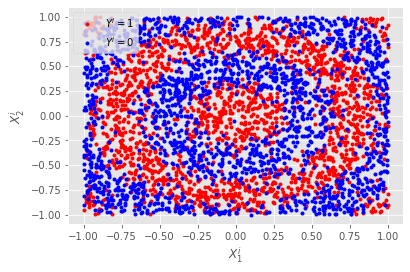

In [4]:
Nsub = 4000
plt.plot(X_1[0:(Nsub-1)][Y[0:(Nsub-1)]==1], 
         X_2[0:(Nsub-1)][Y[0:(Nsub-1)]==1], 
         "ro", markersize=3, label = "$Y^i = 1$")
plt.plot(X_1[0:(Nsub-1)][Y[0:(Nsub-1)]==0], 
         X_2[0:(Nsub-1)][Y[0:(Nsub-1)]==0], 
         "bo", markersize=3, label = "$Y^i = 0$")
plt.xlabel(r"$X^i_1$")
plt.ylabel(r"$X^i_2$")
plt.legend()
plt.show()

Let us try to train a network $\widehat{p} \in \mathcal{N}_4(2,200,200,200,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\sigma)$.

In [5]:
model = keras.Sequential([
    keras.layers.Dense(200, activation="relu", input_shape=(2,)),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
]    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               600       
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


Compile and train $\widehat{p}$ with $Y$ and $\boldsymbol{X}$ using binary cross-entropy loss and Adam optimisation algorithm. We will do $5$ epochs with minibatch size $500$. We monitor the metric <b>accuracy</b>, defined as
\begin{equation*}
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}.
\end{equation*}

In [6]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) #classifier, for even ish 
# split between 1,0 then use metrics="accuracy" #Accuracy increases as train
model.fit(X, Y, batch_size=500, epochs=5)

Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.4388 - accuracy: 0.7998
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4021 - accuracy: 0.8287
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4018 - accuracy: 0.8289
Epoch 4/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.4009 - accuracy: 0.8293
Epoch 5/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4004 - accuracy: 0.8298


After training, plot the true function $p$ first.

C:\Users\RhysL\AppData\Local\Temp\ipykernel_29296\3096154976.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


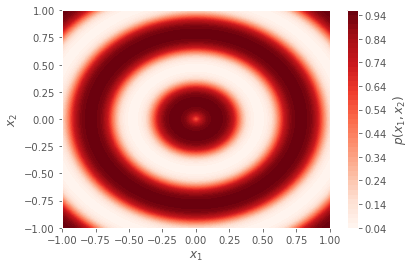

In [7]:
grid = np.linspace(-1, 1, num=1001)
X_1g, X_2g = np.meshgrid(grid, grid)
ptrue = pfunc(X_1g, X_2g)
plt.contourf(X_1g, X_2g, ptrue, 50, cmap="Reds")
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$p(x_1,x_2)$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

Plot then the trained $\widehat{p}$.

C:\Users\RhysL\AppData\Local\Temp\ipykernel_29296\1703845824.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


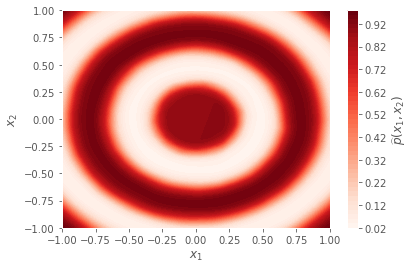

In [8]:
X_1gf = np.reshape(X_1g, (1001*1001, 1))
X_2gf = np.reshape(X_2g, (1001*1001, 1))
Xf = np.concatenate((X_1gf, X_2gf), 1)
ppred = model.predict(Xf)
ppred = np.reshape(ppred,(1001, 1001))
plt.contourf(X_1g, X_2g, ppred, 50, cmap="Reds")
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\widehat{p}(x_1,x_2)$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

Assess the error $|\widehat{p}-p|$

C:\Users\RhysL\AppData\Local\Temp\ipykernel_29296\1621926267.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


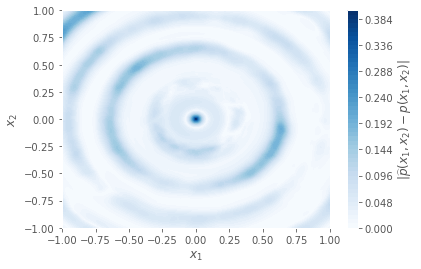

In [9]:
plt.contourf(X_1g, X_2g, np.abs(ptrue-ppred), 50, cmap="Blues")
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$|\widehat{p}(x_1,x_2)-p(x_1,x_2)|$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()